<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 (GAN) Generative Adversarial Network || Generative-AI🔥</div>
</div>

![](https://editor.analyticsvidhya.com/uploads/393951_t78gwhhw-hn1CgXc1K89wA.png)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>
</div>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

2024-07-05 04:04:50.911971: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 04:04:50.912073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 04:04:51.192749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧾Loading Dataset🧾</div>
</div>

In [2]:
(x_train,_),(x_test,_)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>

In [3]:
x_train = x_train / 255.0 
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')

<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 GAN Model 🔥</div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Generator Model ✔
  </div>
</div>

In [4]:
def build_generator():
    model = Sequential()
    model.add(Dense(256,input_dim = 100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28,28,1)))
    return model

Let's go through the `build_generator` function line by line and explain why each part is used:

```python
def build_generator():
    model = Sequential()  # Initializes a new Sequential model.
```
- **Explanation:** This initializes a sequential model, which means the model will have a linear stack of layers.

```python
model.add(Dense(256, input_dim=100))
```
- **Explanation:** Adds a fully connected (dense) layer with 256 neurons. The `input_dim=100` specifies that the input to this layer will be a vector of size 100, which is the size of the noise vector input to the generator.

```python
model.add(LeakyReLU(alpha=0.2))
```
- **Explanation:** Adds a Leaky ReLU activation function. The `alpha=0.2` parameter sets the slope of the negative part of the function to 0.2, allowing a small gradient when the unit is not active. This helps prevent dead neurons.

```python
model.add(Dense(512))
```
- **Explanation:** Adds another fully connected layer with 512 neurons. Increasing the number of neurons helps the model learn more complex representations.

```python
model.add(LeakyReLU(alpha=0.2))
```
- **Explanation:** Adds another Leaky ReLU activation function to introduce non-linearity after the 512-neuron dense layer.

```python
model.add(Dense(1024))
```
- **Explanation:** Adds another fully connected layer with 1024 neurons, further increasing the model's capacity to learn complex patterns.

```python
model.add(LeakyReLU(alpha=0.2))
```
- **Explanation:** Adds another Leaky ReLU activation function to introduce non-linearity after the 1024-neuron dense layer.

```python
model.add(Dense(28 * 28 * 1, activation='tanh'))
```
- **Explanation:** Adds a fully connected layer with `28 * 28 * 1` neurons, which corresponds to the size of the MNIST images (28x28 pixels with 1 channel). The `tanh` activation function is used here to ensure that the output values are scaled between -1 and 1, which helps stabilize the training of the GAN.

```python
model.add(Reshape((28, 28, 1)))
```
- **Explanation:** Reshapes the output from the previous layer into the shape of an image: 28x28 pixels with 1 channel. This makes the output suitable for comparison with real MNIST images.

```python
return model
```
- **Explanation:** Returns the constructed generator model.

### Summary:
This code defines a generator network for a GAN. The generator starts with a 100-dimensional noise vector and transforms it through a series of dense layers with Leaky ReLU activations, progressively increasing the dimensionality of the representation. The final layer uses a `tanh` activation function to produce values between -1 and 1, matching the normalized MNIST image data. The output is then reshaped to the size of the MNIST images (28x28x1).

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Discriminator Model ✔
  </div>
</div>

In [5]:
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

Let's go through the `build_discriminator` function line by line and explain why each part is used:

```python
def build_discriminator():
    model = Sequential()  # Initializes a new Sequential model.
```
- **Explanation:** This initializes a sequential model, which means the model will have a linear stack of layers.

```python
model.add(Flatten(input_shape=(28, 28, 1)))
```
- **Explanation:** Flattens the input image of shape (28, 28, 1) into a 1D array of size 28*28*1 = 784. This makes the image data suitable for fully connected layers that follow.

```python
model.add(Dense(512))
```
- **Explanation:** Adds a fully connected (dense) layer with 512 neurons. This layer learns to extract features from the flattened image data.

```python
model.add(LeakyReLU(alpha=0.2))
```
- **Explanation:** Adds a Leaky ReLU activation function. The `alpha=0.2` parameter sets the slope of the negative part of the function to 0.2, allowing a small gradient when the unit is not active. This helps prevent dead neurons.

```python
model.add(Dense(256))
```
- **Explanation:** Adds another fully connected layer with 256 neurons. This layer further processes the features extracted by the previous layer.

```python
model.add(LeakyReLU(alpha=0.2))
```
- **Explanation:** Adds another Leaky ReLU activation function to introduce non-linearity after the 256-neuron dense layer.

```python
model.add(Dense(1, activation='sigmoid'))
```
- **Explanation:** Adds a fully connected layer with a single neuron and a `sigmoid` activation function. This layer outputs a value between 0 and 1, representing the probability that the input image is real (1) or fake (0).

```python
return model
```
- **Explanation:** Returns the constructed discriminator model.

### Summary:
This code defines a discriminator network for a GAN. The discriminator starts by flattening the 28x28x1 input image into a 1D array. It then processes the flattened image through a series of dense layers with Leaky ReLU activations, which help the model learn complex features and patterns in the data. The final layer uses a `sigmoid` activation function to output a single value between 0 and 1, indicating whether the input image is real or fake.

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Overall Model ✔
  </div>
</div>

In [6]:
def build_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = tf.keras.Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

Let's go through the `build_gan` function line by line and explain why each part is used:

```python
def build_gan(generator, discriminator):
```
- **Explanation:** This function takes the generator and discriminator models as inputs and builds the GAN model by combining them.

```python
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- **Explanation:** Compiles the discriminator model. The `binary_crossentropy` loss function is used because the discriminator is performing binary classification (real or fake). The `adam` optimizer is chosen for its efficiency and good performance. The accuracy metric is used to monitor the training performance.

```python
discriminator.trainable = False
```
- **Explanation:** Sets the discriminator's trainable property to `False`. This ensures that the discriminator's weights are not updated when training the combined GAN model. Only the generator's weights will be updated during this phase.

```python
gan_input = tf.keras.Input(shape=(100,))
```
- **Explanation:** Defines the input for the GAN model. The input shape is `(100,)`, which matches the size of the noise vector that will be fed into the generator.

```python
x = generator(gan_input)
```
- **Explanation:** Passes the GAN input through the generator model. This generates fake images from the noise vector.

```python
gan_output = discriminator(x)
```
- **Explanation:** Passes the generated images (output of the generator) through the discriminator model. This gives the discriminator's output (probability of the image being real or fake).

```python
gan = tf.keras.Model(gan_input, gan_output)
```
- **Explanation:** Creates a new model (GAN) that takes the noise vector as input and outputs the discriminator's classification of the generated image. This model combines both the generator and the discriminator.

```python
gan.compile(loss='binary_crossentropy', optimizer='adam')
```
- **Explanation:** Compiles the GAN model. The `binary_crossentropy` loss function is used because the GAN is also performing binary classification (real or fake) for the discriminator's output. The `adam` optimizer is chosen for its efficiency and good performance.

```python
return gan
```
- **Explanation:** Returns the constructed GAN model.

### Summary:
This code defines how to build and compile a GAN model by combining the generator and discriminator. The discriminator is compiled separately and its trainable property is set to `False` to ensure it does not get updated when training the GAN. The GAN model is created by passing the noise vector through the generator to produce fake images, which are then passed to the discriminator. The combined model is compiled with the `binary_crossentropy` loss function and the `adam` optimizer, and the resulting GAN model is returned.

In [7]:
# Training parameters
epochs = 2000
batch_size = 200
save_interval = 20

In [8]:
half_batch = int(batch_size / 2)
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Generator Model Summary✔
  </div>
</div>

In [9]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Discriminator Model Summary✔
  </div>
</div>

In [10]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 533,505 (2.04 MB)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ GAN Model Summary✔
  </div>
</div>

In [11]:
gan.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │     1,486,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       533,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,019,857 (7.71 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 533,505 (2.04 MB)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ GAN Model Training✔
  </div>
</div>

In [12]:
# Train the GAN
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_imgs = x_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    g_loss = gan.train_on_batch(noise, valid_y)
    
    # Print progress
    if epoch % save_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step

I0000 00:00:1720152311.900851      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720152311.918327      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.794214129447937 | D accuracy: 19.249999523162842] [G loss: [array(0.76158035, dtype=float32), array(0.76158035, dtype=float32), array(0.305, dtype=float32)]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


W0000 00:00:1720152315.292732      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20 [D loss: 6.6036882400512695 | D accuracy: 9.37485471367836] [G loss: [array(6.7182384, dtype=float32), array(6.7182384, dtype=float32), array(0.09261905, dtype=float32)]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

Let's go through the GAN training loop line by line and explain why each part is used:

```python
for epoch in range(epochs):
```
- **Explanation:** This loop runs for a specified number of epochs, where each epoch represents one complete pass through the training data.

```python
# Train discriminator
```
- **Explanation:** The first step in each epoch is to train the discriminator.

```python
idx = np.random.randint(0, x_train.shape[0], half_batch)
real_imgs = x_train[idx]
```
- **Explanation:** Randomly selects `half_batch` number of real images from the training set. This helps in providing diverse examples to the discriminator.

```python
noise = np.random.normal(0, 1, (half_batch, 100))
gen_imgs = generator.predict(noise)
```
- **Explanation:** Generates `half_batch` number of noise vectors (of size 100) from a normal distribution. These noise vectors are then fed to the generator to produce fake images.

```python
d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
```
- **Explanation:** Trains the discriminator on the real images with labels of 1 (indicating real). The `train_on_batch` method updates the discriminator's weights based on this batch of real images.

```python
d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
```
- **Explanation:** Trains the discriminator on the fake images with labels of 0 (indicating fake). The `train_on_batch` method updates the discriminator's weights based on this batch of fake images.

```python
d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
```
- **Explanation:** Computes the average discriminator loss by taking the mean of the real and fake losses. This gives an overall measure of the discriminator's performance in distinguishing real and fake images.

```python
# Train generator
```
- **Explanation:** The next step in each epoch is to train the generator.

```python
noise = np.random.normal(0, 1, (batch_size, 100))
valid_y = np.array([1] * batch_size)
```
- **Explanation:** Generates a new batch of noise vectors (of size `batch_size` and 100 dimensions) from a normal distribution. The labels `valid_y` are set to 1 for the entire batch, indicating that we want the generator to produce images that the discriminator will classify as real.

```python
g_loss = gan.train_on_batch(noise, valid_y)
```
- **Explanation:** Trains the GAN model on the noise vectors with labels of 1. This effectively trains the generator to produce images that can fool the discriminator, as the discriminator's weights are frozen during this step. The `train_on_batch` method updates the generator's weights based on this batch of noise vectors and the discriminator's feedback.

```python
# Print progress
if epoch % save_interval == 0:
    print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
```
- **Explanation:** Prints the progress at regular intervals (`save_interval`). This includes the current epoch number, the discriminator loss (`d_loss[0]`), the discriminator accuracy (`d_loss[1]` multiplied by 100 to convert it to percentage), and the generator loss (`g_loss`). This helps in monitoring the training process and understanding how well the GAN is learning over time.

### Summary:
The training loop alternates between training the discriminator and the generator in each epoch. The discriminator is trained on both real and fake images to improve its ability to distinguish between them. The generator is then trained to produce images that can fool the discriminator into classifying them as real. This adversarial process continues for the specified number of epochs, with progress being printed at regular intervals to monitor the training.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 GAN Prediction🔥</div>
</div>

In [13]:
noise = np.random.normal(0, 1, (10, 100))
gen_imgs = generator.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


/tmp/ipykernel_24/134842675.py:21: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.3, hspace=0.3)


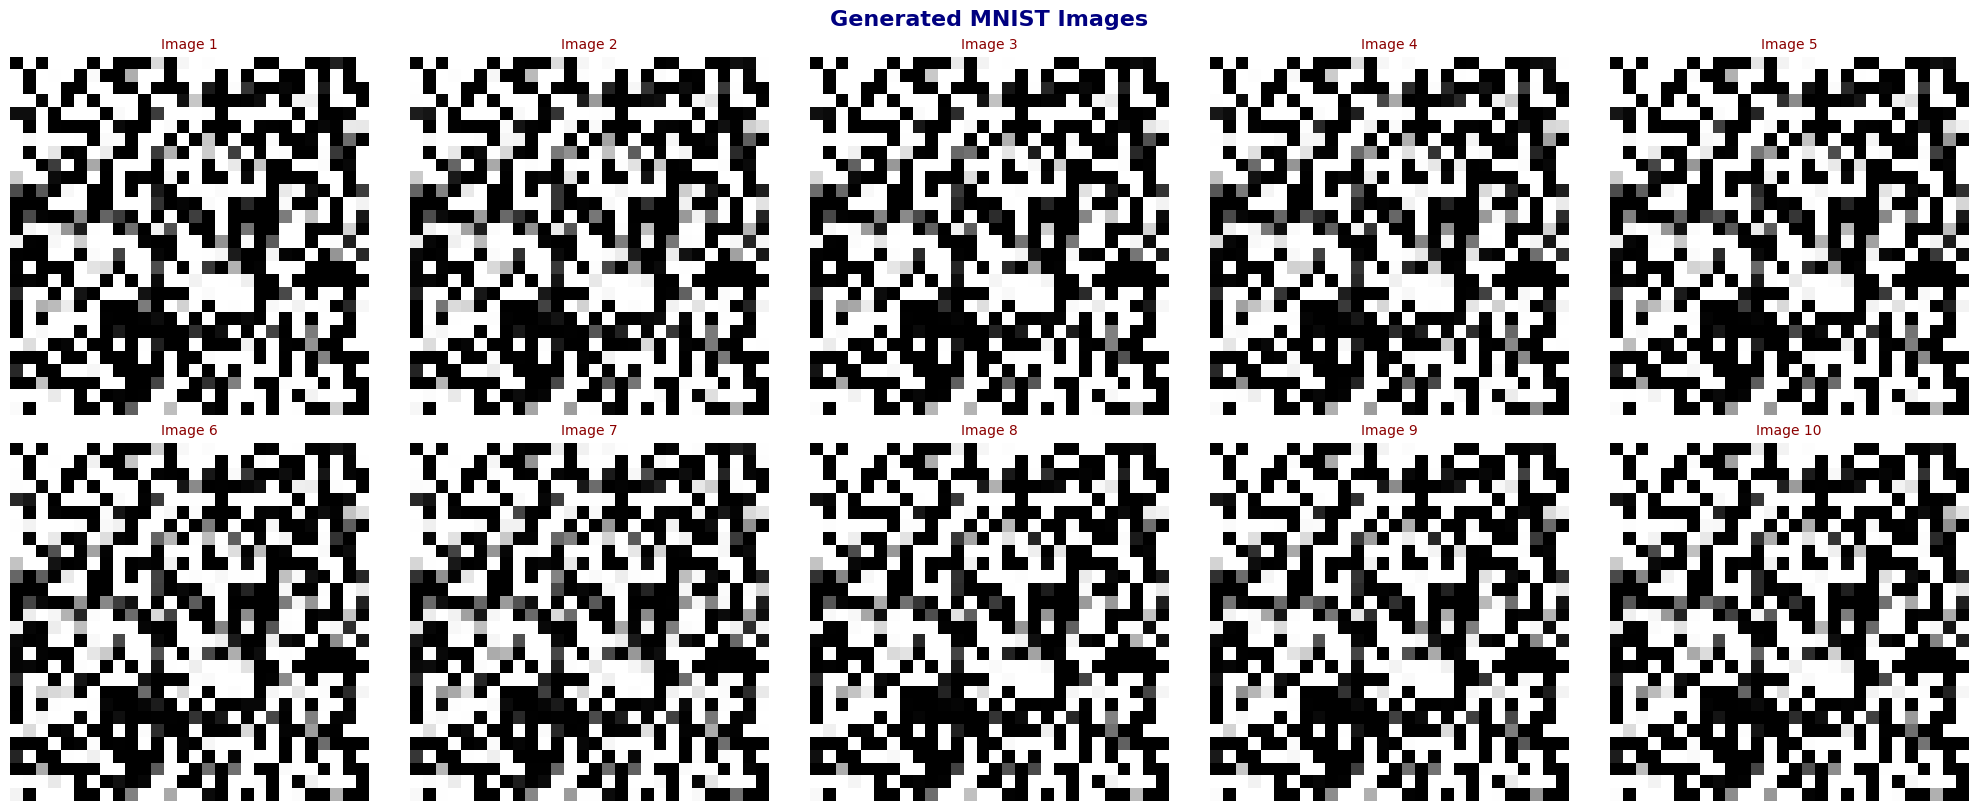

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Rescale images to [0, 1]
gen_imgs = 0.5 * gen_imgs + 0.5

# Create a figure with a specific size
fig, axs = plt.subplots(2, 5, figsize=(20, 8), constrained_layout=True)

# Set a title for the whole figure
fig.suptitle('Generated MNIST Images', fontsize=16, weight='bold', color='navy')

# Loop through the subplots and plot the images
for i in range(10):
    ax = axs[i // 5, i % 5]  # Determine the subplot location
    ax.imshow(gen_imgs[i, :, :, 0], cmap='gray', interpolation='nearest')
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1}", fontsize=10, color='darkred')

# Remove extra space around the images
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plot
plt.show()